In [28]:
import altair as alt
from vega_datasets import data

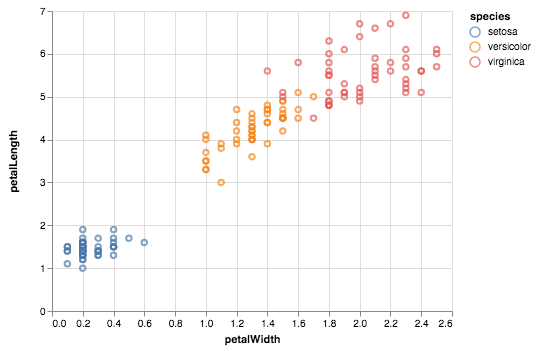

In [30]:
iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='petalWidth',
    y='petalLength',
    color='species'
).interactive()

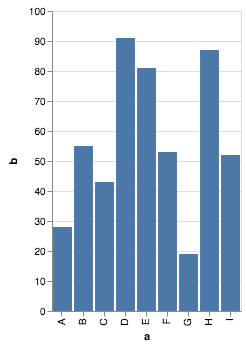

In [31]:
import pandas as pd

data = pd.DataFrame({
    'a': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'b': [28, 55, 43, 91, 81, 53, 19, 87, 52]
})

alt.Chart(data).mark_bar().encode(
    x='a',
    y='b'
)

In [25]:
from vega_datasets import data
cars = data.cars()

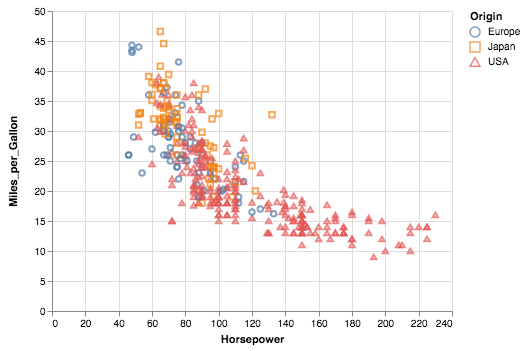

In [32]:
alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin:N',
    shape='Origin:N'
)

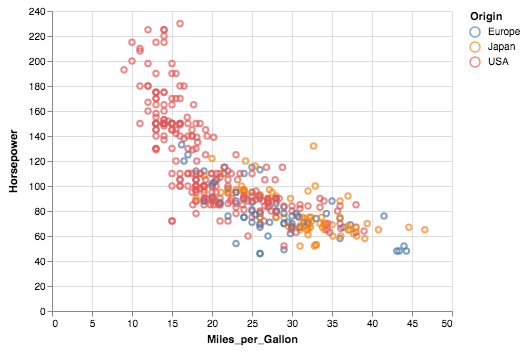

In [37]:
#from vega_datasets import data
#cars = data.cars()

brush = alt.selection(type='interval')

alt.Chart(cars).mark_point().encode(
    x='Miles_per_Gallon:Q',
    y='Horsepower:Q',
    color='Origin:N'
).properties(
    selection=brush
)

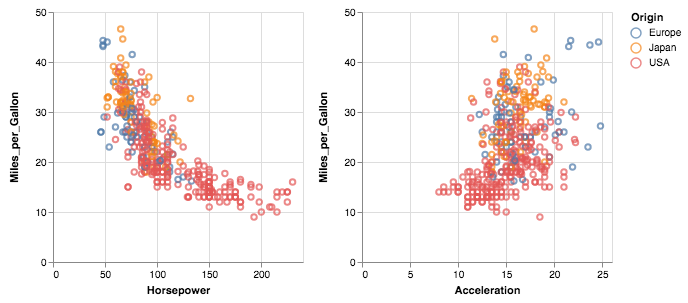

In [39]:
#from vega_datasets import data
#cars = data.cars()

brush = alt.selection(type='interval', resolve='global')

base = alt.Chart(cars).mark_point().encode(
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.ColorValue('gray'))
).properties(
    selection=brush,
    width=250,
    height=250
)

base.encode(x='Horsepower') | base.encode(x='Acceleration')

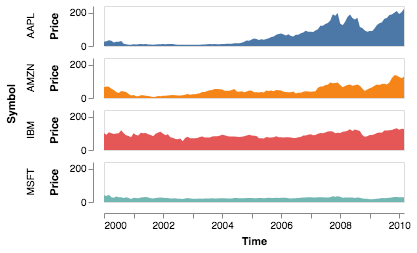

In [40]:
#import altair as alt
from altair.expr import datum
#from vega_datasets import data

source = data.stocks()

alt.Chart(source).mark_area().encode(
    alt.X('date:T', axis=alt.Axis(format='%Y', title='Time', grid=False)),
    alt.Y('price:Q', axis=alt.Axis(title='Price', grid=False)),
    alt.Color('symbol', legend=None),
    alt.Row('symbol:N', header=alt.Header(title='Symbol'))
).properties(
    width=300,
    height=40
).transform_filter(
    datum.symbol != 'GOOG'
)

In [42]:
#from vega_datasets import data

df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [44]:
scale = alt.Scale(domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
                  range=['#e7ba52', '#c7c7c7', '#aec7e8', '#1f77b4', '#9467bd'])

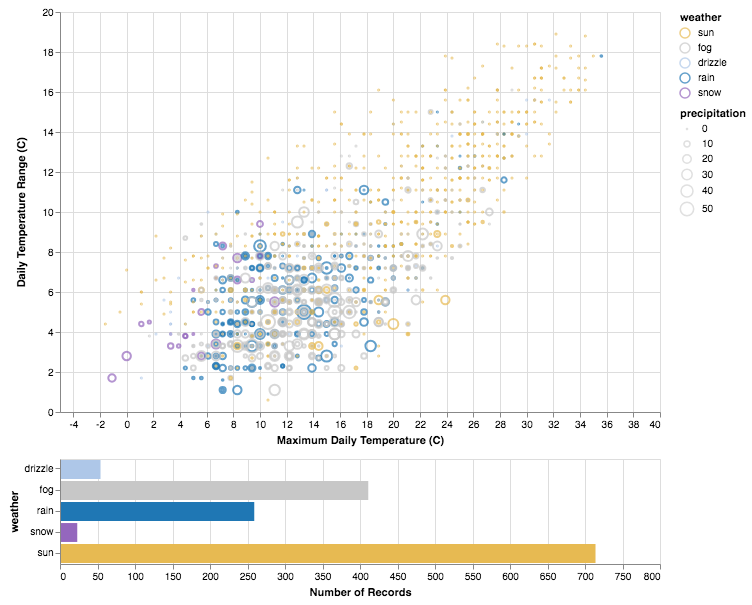

In [45]:
brush = alt.selection(type='interval')

points = alt.Chart(df).mark_point().encode(
    alt.X('temp_max:Q', axis=alt.Axis(title='Maximum Daily Temperature (C)')),
    alt.Y('temp_range:Q', axis=alt.Axis(title='Daily Temperature Range (C)')),
    color=alt.condition(brush, 'weather:N', alt.value('lightgray'), scale=scale),
    size=alt.Size('precipitation:Q', scale=alt.Scale(range=[1, 200]))
).transform_calculate(
    "temp_range", "datum.temp_max - datum.temp_min"
).properties(
    width=600,
    height=400,
    selection=brush
)

bars = alt.Chart(df).mark_bar().encode(
    x='count()',
    y='weather:N',
    color=alt.Color('weather:N', scale=scale),
).transform_calculate(
    "temp_range", "datum.temp_max - datum.temp_min"
).transform_filter(
    brush.ref()
).properties(
    width=600
)

alt.vconcat(points, bars, data=df)